# 정보시스템설계 및 실습 기말과제
##### 학번: 201320475
##### 이름: 이혁주
##### 학과: 산업공학과
## Problem 2.

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
%matplotlib inline
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

Using TensorFlow backend.


In [2]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(42)

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag

In [3]:
signal_data = arma_generate_sample(ar, ma, 10000)   # arima 데이터 생성
normal_data = np.random.normal(size=10000)
signal_data = signal_data[7000:]
normal_data = normal_data[7000:]

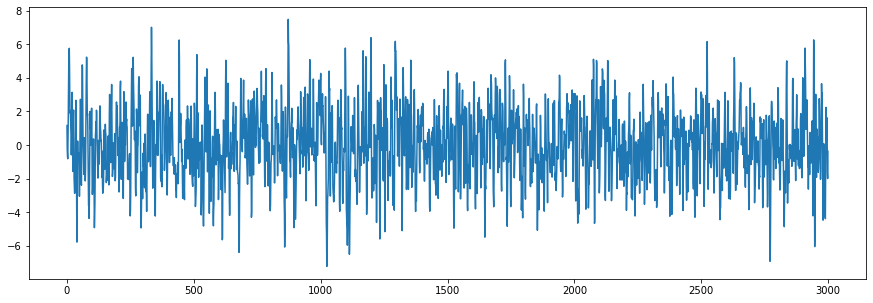

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(signal_data)
plt.show()

In [5]:
class Prediction():
    
    def __init__(self):
        np.random.seed(42)
        tf.set_random_seed(42)
        
    def normalize(self, data):
        maxValue = np.max(data)
        minValue = np.min(data)
        normalized_data = (data - minValue) / (maxValue - minValue)
        
        plt.figure(figsize=(15, 5))
        # plt.plot(signal_data[0:300])
        plt.plot(normalized_data)
        plt.show()
        
        return normalized_data
    
    def get_train_and_test(self, data, ratio):
        index = int(len(data)*ratio)
        train = data[0:index]
        test = data[index:]
        
        return train, test
    
    def create_dataset(self, data, window_size):
        dataX, dataY = [], []
        for i in range(len(data) - window_size):
            dataX.append(data[i:(i+window_size)])
            dataY.append(data[i + window_size])
            
        return np.array(dataX), np.array(dataY)
    
    def create_dataset2(self, data, normal_data, window_size):
        dataX, dataY = [], []
        for i in range(len(data) - window_size):
            dataX.append(list(zip(data[i:(i+window_size)], normal_data[i:(i+window_size)])))
            dataY.append(data[i + window_size])
        return np.array(dataX), np.array(dataY)
    
    def get_mlp_model(self, step_ahead_num, batch_size, epochs):
        
        if step_ahead_num == 1:
                
            # mlp_model
            mlp_model = Sequential()
            mlp_model.add(Dense(32, input_dim = step_ahead_num, activation = 'relu'))
            mlp_model.add(Dense(16, activation = 'relu'))
            mlp_model.add(Dense(8, activation = 'relu'))
            mlp_model.add(Dense(4, activation = 'relu'))
            mlp_model.add(Dense(1))
            print(mlp_model.summary())
            mlp_model.name = "mlp_model_1"

            mlp_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = mlp_model.fit(train_X, train_y, batch_size, epochs, shuffle=False, callbacks=[es])

            return mlp_model, hist
        
        if step_ahead_num == 2:
                
            # mlp_model
            mlp_model = Sequential()
            mlp_model.add(Dense(32, input_dim = step_ahead_num, activation = 'relu'))
            mlp_model.add(Dense(16, activation = 'relu'))
            mlp_model.add(Dense(8, activation = 'relu'))
            mlp_model.add(Dense(4, activation = 'relu'))
            mlp_model.add(Dense(1))
            print(mlp_model.summary())
            mlp_model.name="mlp_model_2"
            
            mlp_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = mlp_model.fit(train_X_2, train_y_2, batch_size, epochs, shuffle=False, callbacks=[es])

            return mlp_model, hist
        
    def get_lstm_model(self, step_ahead_num, batch_size, epochs, neurons):
        
        if step_ahead_num == 1:

            lstm_model = Sequential()
            lstm_model.add(LSTM(neurons, input_shape = (train_X_time.shape[1], train_X_time.shape[2]), return_sequences=False))
            lstm_model.add(Dense(1))
            print(lstm_model.summary())
            lstm_model.name="lstm_model_1"

            lstm_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = lstm_model.fit(train_X_time, train_y, batch_size, epochs, shuffle=False, callbacks=[es])

            return lstm_model, hist
        
        if step_ahead_num == 2:

            lstm_model = Sequential()
            lstm_model.add(LSTM(neurons, input_shape = (train_X_time_2.shape[1], train_X_time_2.shape[2]), return_sequences=False))
            lstm_model.add(Dense(1))
            print(lstm_model.summary())
            lstm_model.name="lstm_model_2"

            lstm_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = lstm_model.fit(train_X_time_2, train_y_2, batch_size, epochs, shuffle=False, callbacks=[es])

            return lstm_model, hist
    
    def get_rnn_model(self, step_ahead_num, batch_size, epochs):
        
        if step_ahead_num == 1:
        
            # rnn_model
            rnn_model = Sequential()
            rnn_model.add(SimpleRNN(8, input_shape = (train_X_time.shape[1], train_X_time.shape[2])))
            rnn_model.add(Dense(1))
            print(rnn_model.summary())
            rnn_model.name="rnn_model_1"

            rnn_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = rnn_model.fit(train_X_time, train_y, batch_size, epochs, shuffle=False, callbacks=[es])

            return rnn_model, hist

        if step_ahead_num == 2:
        
            # rnn_model
            rnn_model = Sequential()
            rnn_model.add(SimpleRNN(8, input_shape = (train_X_time_2.shape[1], train_X_time_2.shape[2])))
            rnn_model.add(Dense(1))
            print(rnn_model.summary())
            rnn_model.name="rnn_model_2"

            rnn_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = rnn_model.fit(train_X_time_2, train_y_2, batch_size, epochs, shuffle=False, callbacks=[es])

            return rnn_model, hist
        
    
    def get_lstm2_model(self, step_ahead_num, batch_size, epochs):
        
        if step_ahead_num == 1:
        
            lstm2_model = Sequential()
            lstm2_model.add(LSTM(8, input_shape = (train_X_with_random.shape[1], train_X_with_random.shape[2]), return_sequences=False))
            lstm2_model.add(Dense(1))
            print(lstm2_model.summary())
            lstm2_model.name="lstm2_model_1"

            lstm2_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = lstm2_model.fit(train_X_with_random, train_y_with_random, batch_size, epochs, shuffle=False, callbacks=[es])

            return lstm2_model, hist

        if step_ahead_num == 2:
        
            lstm2_model = Sequential()
            lstm2_model.add(LSTM(8, input_shape = (train_X_with_random_2.shape[1], train_X_with_random_2.shape[2]), return_sequences=False))
            lstm2_model.add(Dense(1))
            print(lstm2_model.summary())
            lstm2_model.name="lstm2_model_2"

            lstm2_model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mean_squared_error')
            hist = lstm2_model.fit(train_X_with_random_2, train_y_with_random_2, batch_size, epochs, shuffle=False, callbacks=[es])

            return lstm2_model, hist
        
    def predict_data(self, model, test_X, test_Y):

        model_pred = model.predict(test_X)
        print('SSE of {}: {}'.format(model.name, np.sum((model_pred - test_Y)**2)))

#         plt.figure(figsize = (15, 5))
#         plt.plot(model_pred, 'b')
#         plt.plot(test_Y, 'y')
#         plt.show()

        return 


In [6]:
a = Prediction()

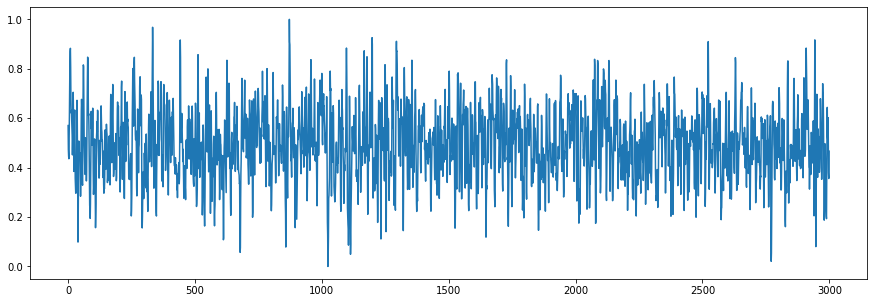

In [7]:
normalized_data = a.normalize(signal_data)

In [8]:
train, test = a.get_train_and_test(data=normalized_data, ratio=0.8)

normal_for_train, normal_for_test = a.get_train_and_test(data=normal_data, ratio=0.8)

In [9]:
# 1-step-ahead
# For MLP
train_X, train_y = a.create_dataset(train, window_size=1)
test_X, test_y = a.create_dataset(test, window_size=1)

# For rnn & lstm
train_X_time = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X_time = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

# For lstm with random noise
train_X_with_random, train_y_with_random = a.create_dataset2(train, normal_for_train, window_size=1)
test_X_with_random, test_y_with_random = a.create_dataset2(test, normal_for_test, window_size=1)


# 2-step-ahead
# For MLP
train_X_2, train_y_2 = a.create_dataset(train, window_size=2)
test_X_2, test_y_2 = a.create_dataset(test, window_size=2)

# For rnn & lstm
train_X_time_2 = train_X_2.reshape(train_X_2.shape[0], train_X_2.shape[1], 1)
test_X_time_2 = test_X_2.reshape(test_X_2.shape[0], test_X_2.shape[1], 1)

# For lstm with random noise
train_X_with_random_2, train_y_with_random_2 = a.create_dataset2(train, normal_for_train, window_size=2)
test_X_with_random_2, test_y_with_random_2 = a.create_dataset2(test, normal_for_test, window_size=2)

In [10]:
# 코드의 결과만을 확인하기 위해 epoch는 1로 설정

mlp_model_1, mlp_model_1_hist = a.get_mlp_model(step_ahead_num=1, batch_size=16, epochs=1)
lstm_model_1, lstm_model_1_hist = a.get_lstm_model(step_ahead_num=1, batch_size=16, epochs=1, neurons=4)
rnn_model_1, rnn_model_1_hist = a.get_rnn_model(step_ahead_num=1, batch_size=16, epochs=1)
lstm2_model_1, lstm2_model_1_hist = a.get_lstm2_model(step_ahead_num=1, batch_size=16, epochs=1)

mlp_model_2, mlp_model_2_hist = a.get_mlp_model(step_ahead_num=2, batch_size=16, epochs=1)
lstm_model_2, lstm_model_2_hist = a.get_lstm_model(step_ahead_num=2, batch_size=16, epochs=1, neurons=4)
rnn_model_2, rnn_model_2_hist = a.get_rnn_model(step_ahead_num=2, batch_size=16, epochs=1)
lstm2_model_2, lstm2_model_2_hist = a.get_lstm2_model(step_ahead_num=2, batch_size=16, epochs=1)

W1221 19:08:32.438751 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1221 19:08:32.443928 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1221 19:08:32.449625 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1221 19:08:32.600221 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
None


W1221 19:08:32.760792 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1221 19:08:32.968237 13644 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/1
2399/2399 [==============================] - 1s 244us/step - loss: 0.2038


C:\Anaconda_\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


W1221 19:08:34.407390 13644 deprecation.py:323] From C:\Anaconda_\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
2399/2399 [==============================] - 1s 510us/step - loss: 0.1001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
2399/2399 [==============================] - 1s 294us/step - loss: 0.0120
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8)                 352       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 361
Trainable params: 361

In [11]:
a.predict_data(mlp_model_1, test_X, test_y)
a.predict_data(lstm_model_1, test_X_time, test_y)
a.predict_data(rnn_model_1, test_X_time, test_y)
a.predict_data(lstm2_model_1, test_X_with_random, test_y_with_random)
print('\n')
a.predict_data(mlp_model_2, test_X_2, test_y_2)
a.predict_data(lstm_model_2, test_X_time_2, test_y_2)
a.predict_data(rnn_model_2, test_X_time_2, test_y_2)
a.predict_data(lstm2_model_2, test_X_with_random_2, test_y_with_random_2)

SSE of mlp_model_1: 49607.12764277998
SSE of lstm_model_1: 13435.248530037274
SSE of rnn_model_1: 9430.187917633377
SSE of lstm2_model_1: 10914.19819576749


SSE of mlp_model_2: 7662.4109367100245
SSE of lstm_model_2: 13370.048635063855
SSE of rnn_model_2: 9006.26137190325
SSE of lstm2_model_2: 8428.35785824633


## Problem 4.

##### lstm_model_1을 기준으로 개선 시도

In [12]:
lstm_model_1, lstm_model_1_hist = a.get_lstm_model(neurons=8, step_ahead_num=1, batch_size=16, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
2399/2399 [==============================] - 2s 790us/step - loss: 0.1746
Epoch 2/100
2399/2399 [==============================] - 0s 173us/step - loss: 0.0300
Epoch 3/100
2399/2399 [==============================] - 0s 179us/step - loss: 0.0143
Epoch 4/100
2399/2399 [==============================] - 0s 188us/step - loss: 0.0136
Epoch 5/100
2399/2399 [==============================] - ETA: 0s - loss: 0.013 - 0s 184us/step - loss: 0.0129
Epoch 6/100
2399/2399 [==============================] - 0s 192us/step - loss: 0.

In [13]:
a.predict_data(lstm_model_1, test_X_time, test_y)  # 개선 전 SSE, 약 10300

SSE of lstm_model_1: 10296.937020184714


#### 개선 전 (lstm model, 1-step-기준) batch_size=16, epochs=100, neurons=8, optimizer=Adam, learning_rate=0.001
#### 결과 (loss: 0.0079, SSE: 10296)
### Loss Graph

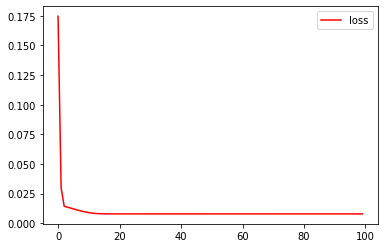

In [14]:
plt.plot(lstm_model_1_hist.history['loss'], c='r', label='loss')
plt.legend(loc = 'best')
plt.show()

loss 그래프를 살펴 보았을 때, loss 값이 최적값으로 수렴하는 모습을 보임. 이를 보고 현재 optimizer와 learning rate의 변경은 무의미한 것을 알 수 있음.
현재 데이터 셋에 대해선 최적으로 학습을 했다는 결론을 내렸으며, 더 나은 결과를 얻기 위해서는 ***네트워크의 크기 (number of neurons)***를 키움과 동시에 ***Training dataset의 추가 확보***가 주효할 것이라고 판단함. 

다음 모델링에서 네트워크의 크기를 증가시키고 ***(8 -> 16)***, Test dataset은 그대로 유지한 상태로,
Train dataset의 크기를 증가시킬 것. ***(Train: 2400 -> 9400, Test: 600 -> 600)***


- 추가적으로 Bidirectional lstm이나 layer를 여러 개 쌓는 방법도 가능하나, 연산 시간 문제 등으로 실험하지 않음.

#### Dataset 추가

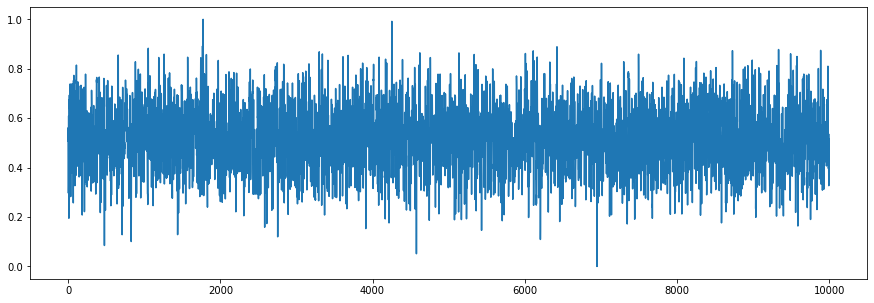

Train: (9400,) Test: (600,)


In [15]:
signal_data = arma_generate_sample(ar, ma, 10000)   # arima 데이터 생성
normal_data = np.random.normal(size=10000)
# signal_data = signal_data[5000:]
# normal_data = normal_data[5000:]

normalized_data = a.normalize(signal_data) # 데이터셋 10000개
train = normalized_data[:9400]             # train 9400개
test = normalized_data[9400:]              # test 600개
print('Train:',train.shape,'Test:', test.shape)

train_X, train_y = a.create_dataset(train, window_size=1)
test_X, test_y = a.create_dataset(test, window_size=1)

train_X_time = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X_time = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [16]:
lstm_model_1, lstm_model_1_hist = a.get_lstm_model(neurons=8, step_ahead_num=1, batch_size=16, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
9399/9399 [==============================] - 3s 345us/step - loss: 0.0408
Epoch 2/100
9399/9399 [==============================] - 2s 179us/step - loss: 0.0075
Epoch 3/100
9399/9399 [==============================] - 2s 184us/step - loss: 0.0063
Epoch 4/100
9399/9399 [==============================] - 2s 174us/step - loss: 0.0056
Epoch 5/100
9399/9399 [==============================] - 2s 184us/step - loss: 0.0054
Epoch 6/100
9399/9399 [==============================] - 2s 179us/step - loss: 0.0054
Epoch 7/100
9399/93

In [17]:
a.predict_data(lstm_model_1, test_X_time, test_y) 

SSE of lstm_model_1: 8630.206981205589


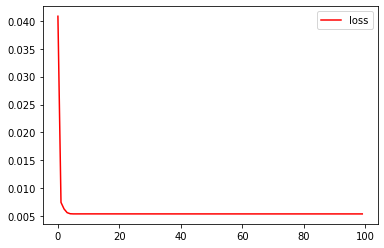

In [18]:
plt.plot(lstm_model_1_hist.history['loss'], c='r', label='loss')
plt.legend(loc = 'best')
plt.show()

Train dataset의 증가만으로 더욱 개선된 결과를 얻을 수 있음. **SSE 10300 -> 8630로 감소, loss 0.0079 -> 0.0054으로 감소**

#### Network의 크기 확대

In [19]:
lstm_model_1, lstm_model_1_hist = a.get_lstm_model(neurons=16, step_ahead_num=1, batch_size=16, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
9399/9399 [==============================] - 4s 395us/step - loss: 0.0388
Epoch 2/100
9399/9399 [==============================] - 2s 189us/step - loss: 0.0072
Epoch 3/100
9399/9399 [==============================] - 2s 192us/step - loss: 0.0060
Epoch 4/100
9399/9399 [==============================] - 2s 195us/step - loss: 0.0055
Epoch 5/100
9399/9399 [==============================] - 2s 197us/step - loss: 0.0054
Epoch 6/100
9399/9399 [==============================] - 2s 219us/step - loss: 0.0054
Epoch 7/100
939

In [20]:
a.predict_data(lstm_model_1, test_X_time, test_y) 

SSE of lstm_model_1: 8621.629485173748


네트워크 크기를 증가에 따른 개선 효과는 SSE 8630 -> 8621, loss 0.0054 -> 0.0054로 크지 않음. 실제로 RNN의 neuron의 수가 8개인 네트워크도 이미 복잡한(큰) 편에 속함.

지금까지 개선을 시도한 모델이 최적값(loss 수렴)을 찾았다는 점에서 batch_size, epochs, activation function, optimizer의 변경은 개선에 크게 영향을 크게 미치지 않을 것이라고 판단하였으며, loss fucntion 또한 SSE값을 감소 시키는데 가장 적합하므로 변경하지 않음.

결과적으로 머신 러닝 프로젝트에서 모델이 최적화 되었을 때, 모델의 개선을 위한 가장 효과적인 선택지인 Trainset의 추가 확보가 주효했다.